In [47]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
tasks = pd.read_csv('data/task_report_10.csv')
task_detail = pd.read_csv('data/task_10.csv')
projects = pd.read_csv('data/project_report_10.csv')
project_detail = pd.read_csv('data/project_10.csv')

In [35]:
projects['Progress'] = projects['Completedtask']/projects['TotalTask']*100

projects['Date'] = pd.to_datetime(projects['Date'])
projects['StartDate'] = pd.to_datetime(projects['StartDate'])
projects['EndDate'] = pd.to_datetime(projects['EndDate'])
projects['ActualStartDate'] = pd.to_datetime(projects['ActualStartDate'])
projects['ActualEndDate'] = pd.to_datetime(projects['ActualEndDate'])

projects['DayCount'] = (projects['Date']-projects['StartDate']).dt.days 
projects['Delay'] = (projects['ActualEndDate'] - projects['EndDate']).dt.days

In [36]:
test_idx = projects.loc[projects['ProjectID']==10].index.tolist()

In [38]:
projects_df =  projects.drop(columns=['Date','ProjectID','StartDate','EndDate','ActualStartDate','ActualEndDate'])
projects_df = projects_df.astype(float)

In [41]:
columns = projects_df.columns.tolist()
target = 'Delay'
features = columns.copy()
features.remove(target)

In [42]:
projects_df.corr()[target].abs().sort_values(ascending=False)

Delay            1.000000
OnGoingTask      0.254001
TotalTask        0.201391
DayCount         0.163880
StartedTask      0.092598
Completedtask    0.075740
TotalSpent       0.073285
DelayedTask      0.058001
Progress         0.022946
WorkDay          0.012373
Name: Delay, dtype: float64

In [43]:
X = projects_df.copy()
y = X.pop(target)

In [52]:
X_train = X[~X.index.isin(test_idx)]
y_train = y[~y.index.isin(test_idx)]
X_test = X[X.index.isin(test_idx)]
y_test = y[y.index.isin(test_idx)]

# # Applying standard scaling to the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Creating and training the decision tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluating the model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_pred)
print("Train MAE :", mae_train, " | Test MAE : ", mae_test)

Train MAE : 0.0  | Test MAE :  2.0


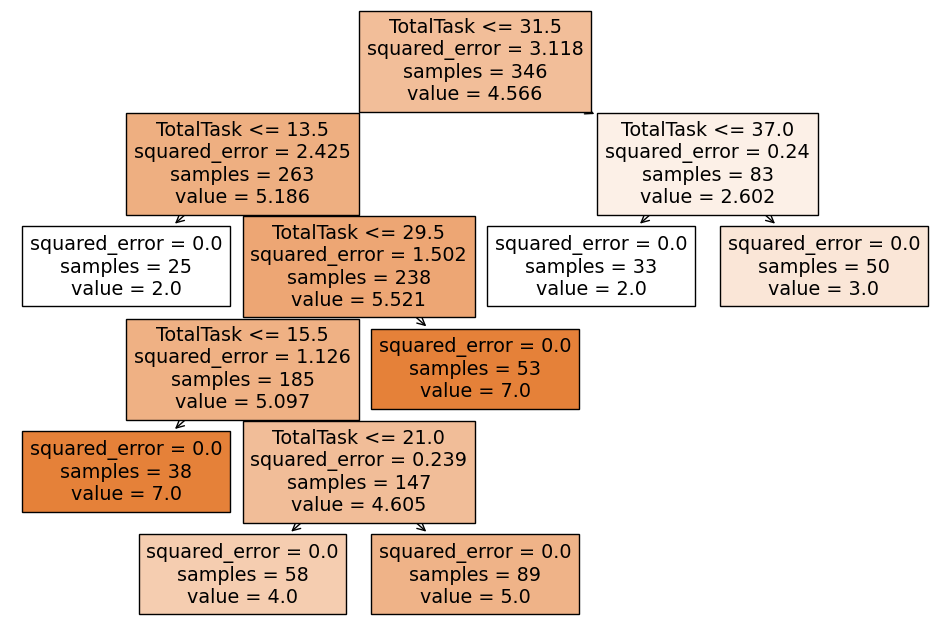

In [50]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()